# 3.3 Datenvisualisierung Python
## Pieplot, Heatmap, Pairplot
### 28.04.2023


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

c:\Users\Admin\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\Admin\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\Admin\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


## Heatmap

In [7]:
diamonds = sns.load_dataset("diamonds")
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [3]:
diamonds_pivot = diamonds.pivot_table(index="cut", columns="color", values="price", aggfunc="median")
diamonds_pivot

color,D,E,F,G,H,I,J
cut,,,,,,,
Ideal,1576.0,1437.0,1775.0,1857.5,2278.0,2659.0,4096.0
Premium,2009.0,1928.0,2841.0,2745.0,4511.0,4640.0,5063.0
Very Good,2310.0,1989.5,2471.0,2437.0,3734.0,3888.0,4113.0
Good,2728.5,2420.0,2647.0,3340.0,3468.5,3639.5,3733.0
Fair,3730.0,2956.0,3035.0,3057.0,3816.0,3246.0,3302.0


In [4]:
diamonds_pivot = diamonds.pivot_table(index="cut", columns="color", values="price", aggfunc="mean")
diamonds_pivot

color,D,E,F,G,H,I,J
cut,,,,,,,
Ideal,2629.094566,2597.550090,3374.939362,3720.706388,3889.334831,4451.970377,4918.186384
Premium,3631.292576,3538.914420,4324.890176,4500.742134,5216.706780,5946.180672,6294.591584
Very Good,3470.467284,3214.652083,3778.820240,3872.753806,4535.390351,5255.879568,5103.513274
Good,3405.382175,3423.644159,3495.750275,4123.482204,4276.254986,5078.532567,4574.172638
Fair,4291.061350,3682.312500,3827.003205,4239.254777,5135.683168,4685.445714,4975.655462


<Axes: xlabel='color', ylabel='cut'>

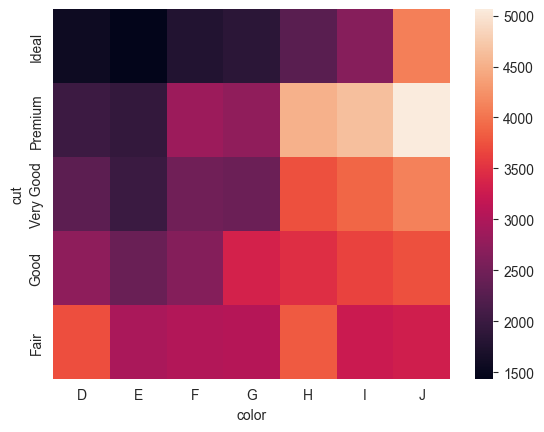

In [16]:
#Jetzt lässt sich auch ein passender Plot dazu erstellen!
sns.heatmap(diamonds_pivot)

<Axes: xlabel='color', ylabel='cut'>

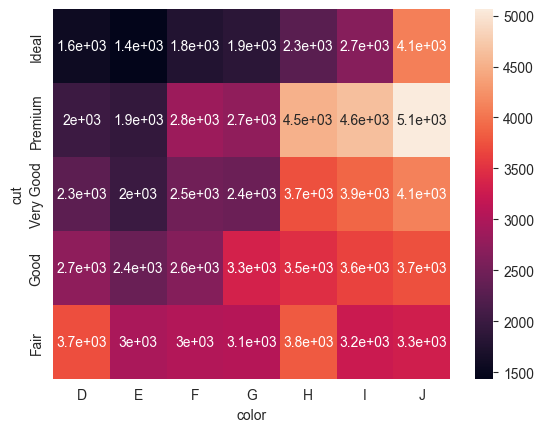

In [17]:
#Auch mit passenden Werten innerhalb des Plots
sns.heatmap(diamonds_pivot, annot=True)

<Axes: xlabel='color', ylabel='cut'>

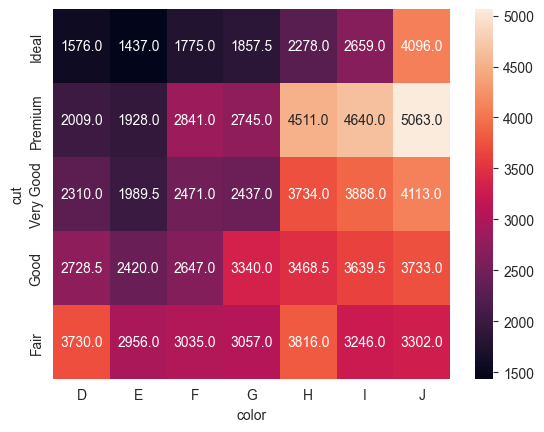

In [116]:
#Auch mit passenden Werten innerhalb des Plots, die gut formatiert sind!
#Übersicht an String-Formatierungen: https://docs.python.org/3/library/string.html?highlight=string#formatspec
sns.heatmap(diamonds_pivot, annot=True, fmt=".1f")

<Axes: xlabel='color', ylabel='cut'>

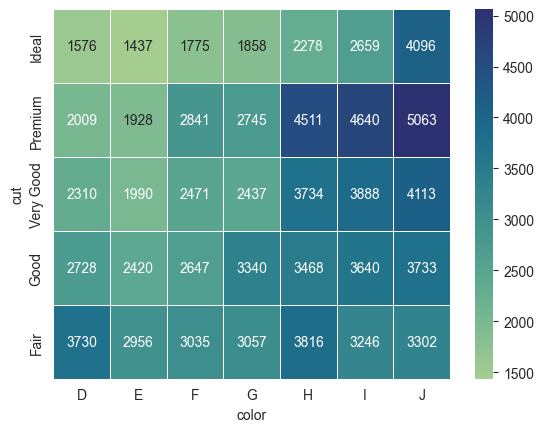

In [57]:
#Und ein letzter Schliff
sns.heatmap(diamonds_pivot, annot=True, fmt=".0f", linewidth=.5, cmap="crest")

## Übungsaufgabe Heatmap

### Erstelle die im Unterricht gezeigte Graphik

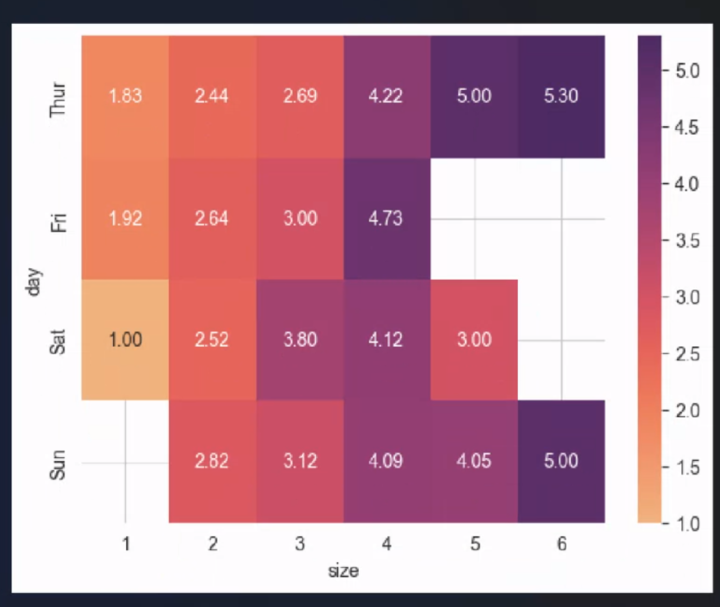

<Axes: xlabel='size', ylabel='day'>

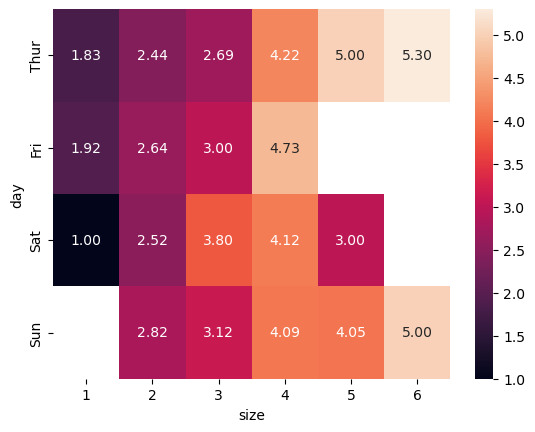

In [8]:
df = sns.load_dataset("tips")
df_pivot = df.pivot_table(index="day", columns="size", values="tip", aggfunc="mean")
sns.heatmap(df_pivot, annot=True, fmt=".2f")

## Pairplot

In [5]:
#Datensatz zum Start
penguins = sns.load_dataset("penguins")
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


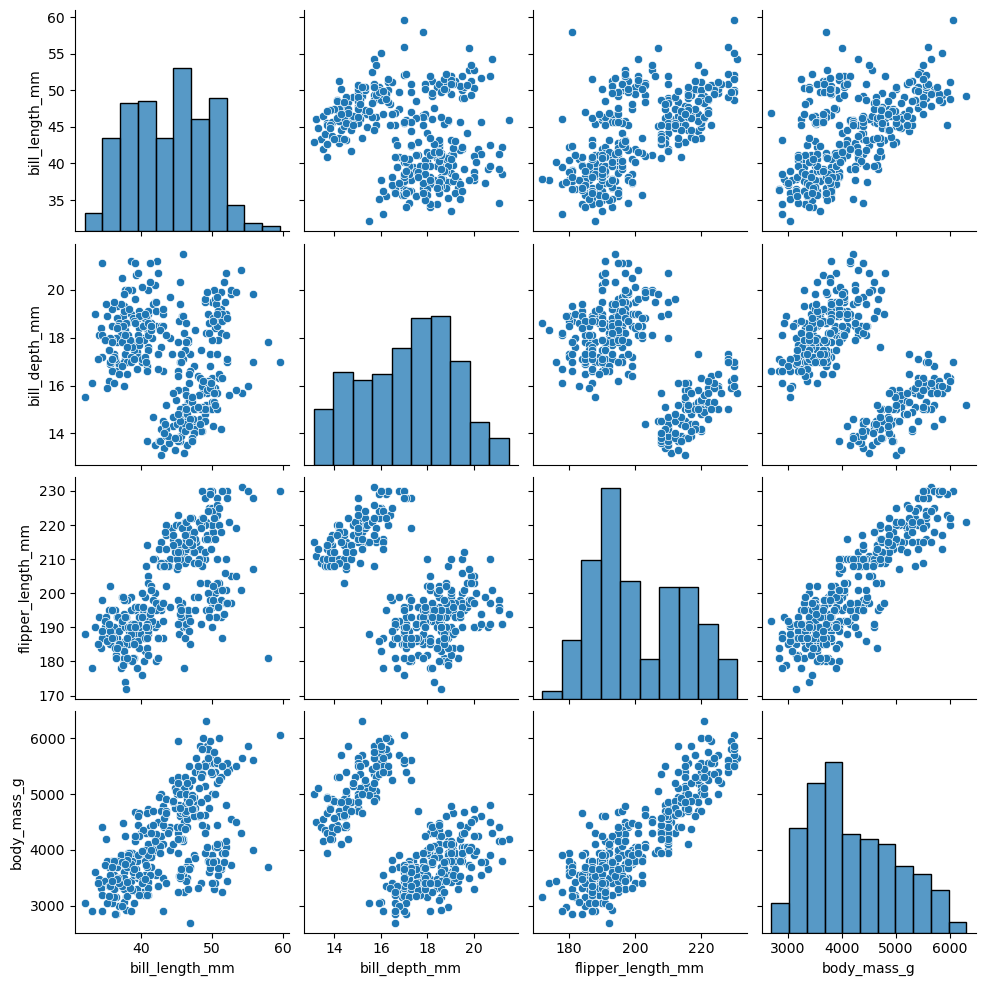

In [6]:
#Pairplot mit Standardeinstellung
sns.pairplot(penguins)

<Axes: xlabel='body_mass_g', ylabel='Count'>

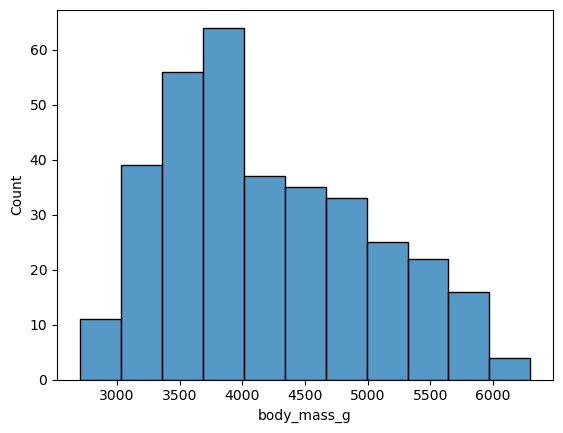

In [9]:
#Was wird auf der Diagonalen geplottet? --> Count-Histplot
sns.histplot(data=penguins, x="body_mass_g")

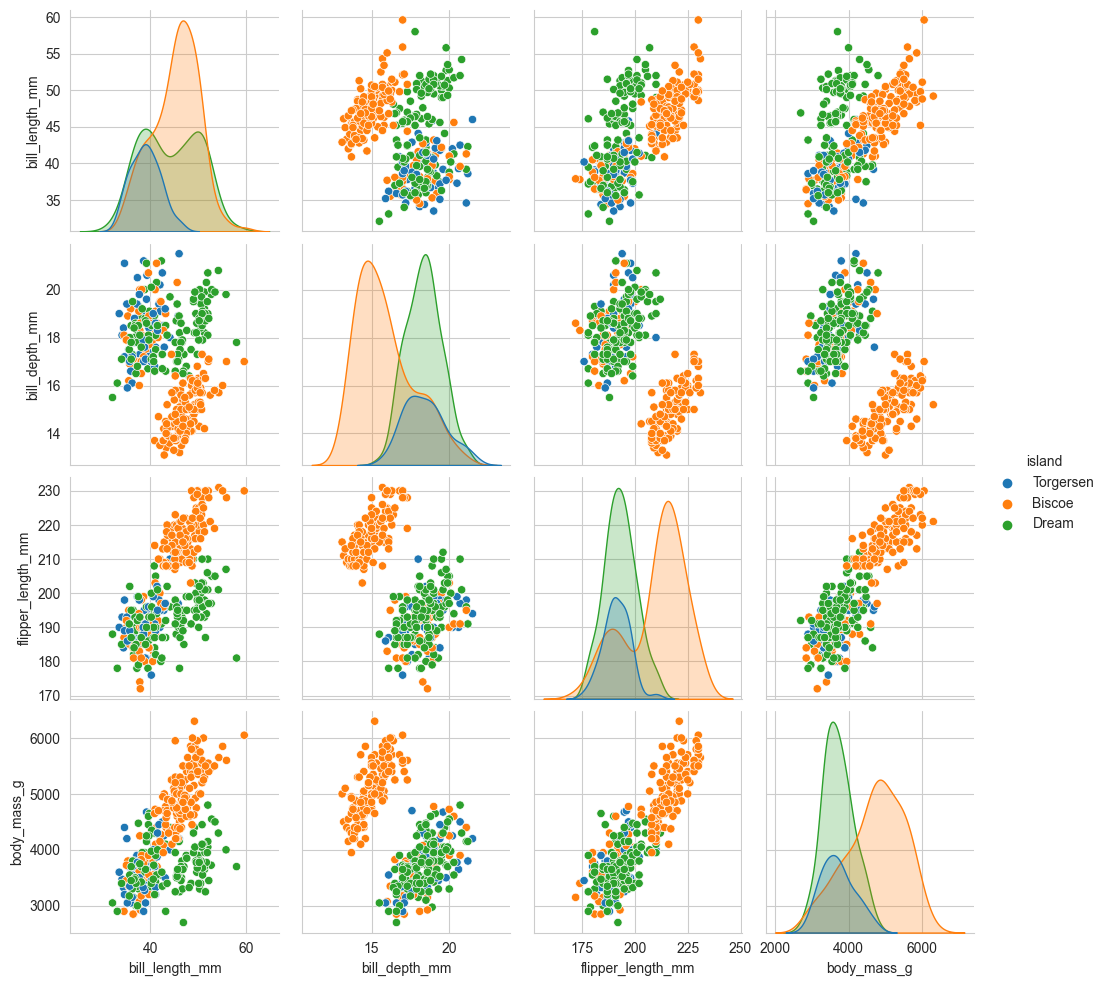

In [60]:
#Pairplot mit Gruppen
sns.pairplot(penguins, hue="island")

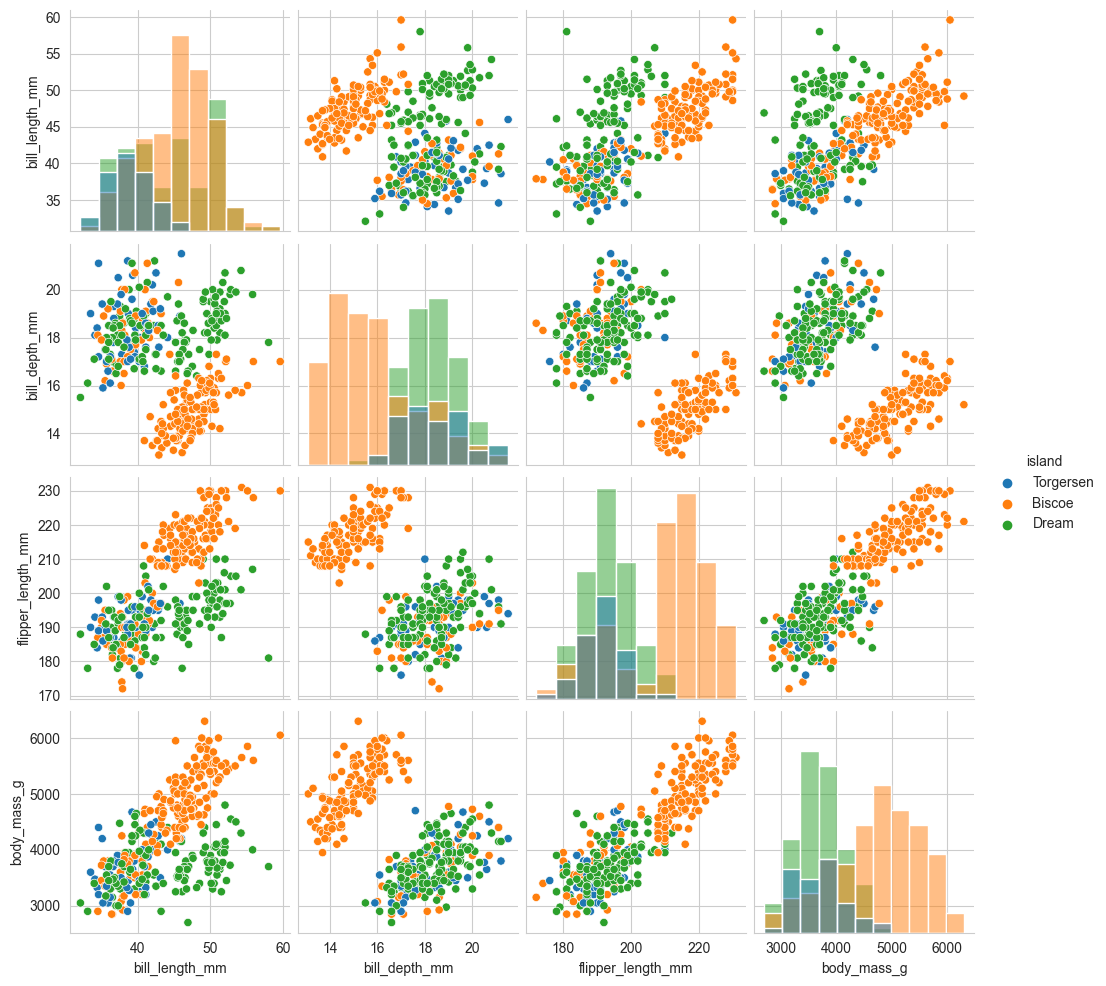

In [63]:
#Einstellung auf der Diagonale
sns.pairplot(penguins, hue="island", diag_kind="hist")
#sns.pairplot(penguins, hue="island", diag_kind="kde")

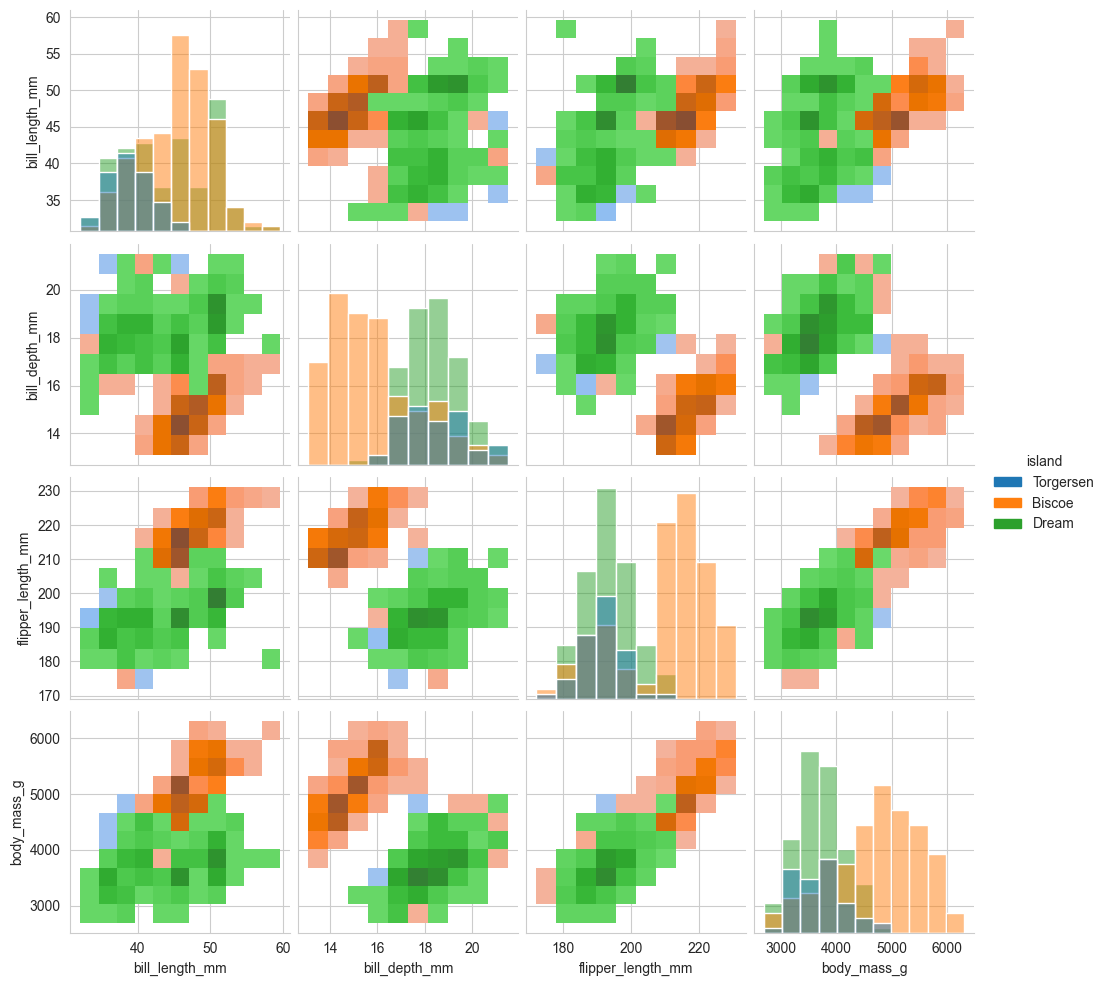

In [70]:
#Einstellung der anderen Plots
sns.pairplot(penguins, hue="island", diag_kind="hist", kind="hist")
#sns.pairplot(penguins, hue="island", diag_kind="kde", kind="hist")

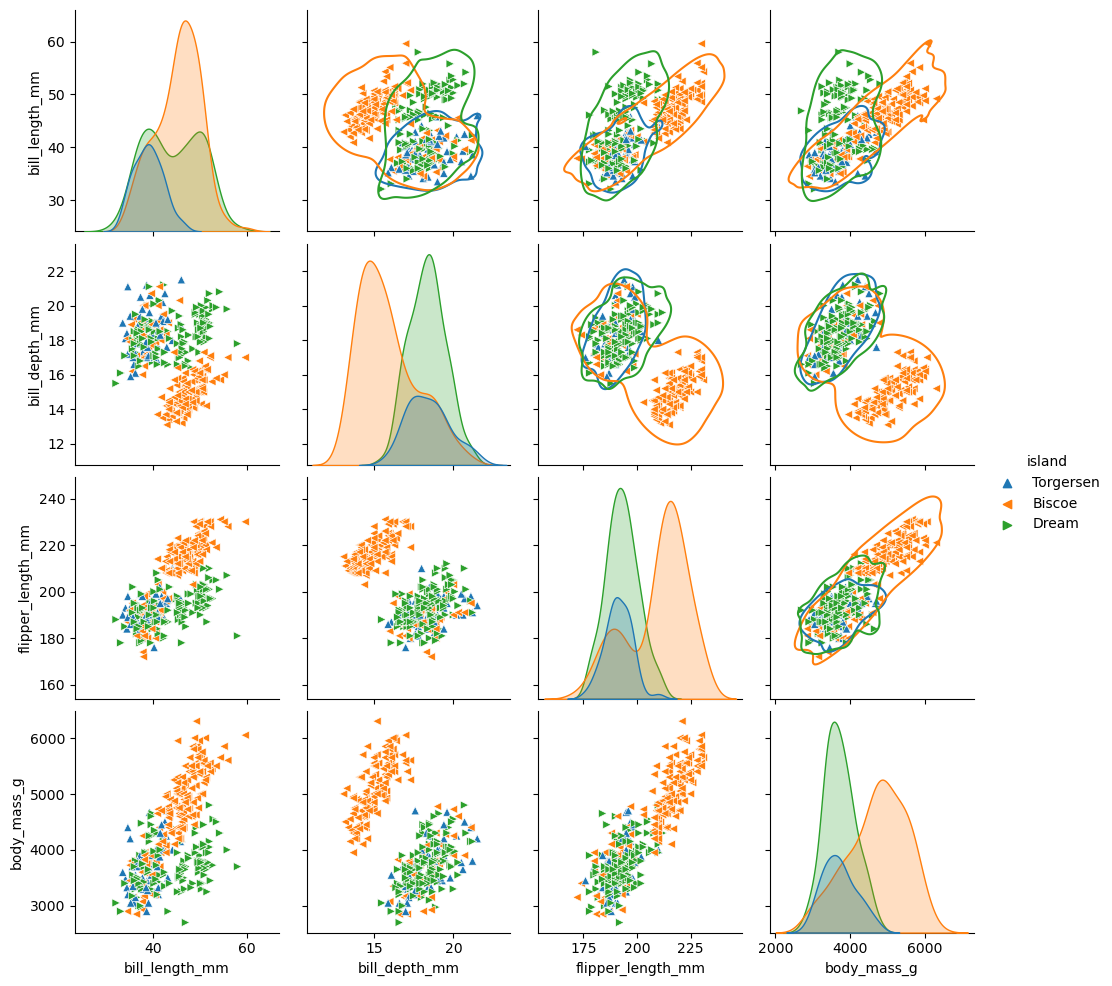

In [10]:
#Marker einsetzen
plot = sns.pairplot(penguins, hue="island", markers=["^", "<", ">"])
plot.map_upper(sns.kdeplot, levels=1)

## Übungsaufgabe Pairplot

### Erstelle die im Unterricht gezeigte Graphik

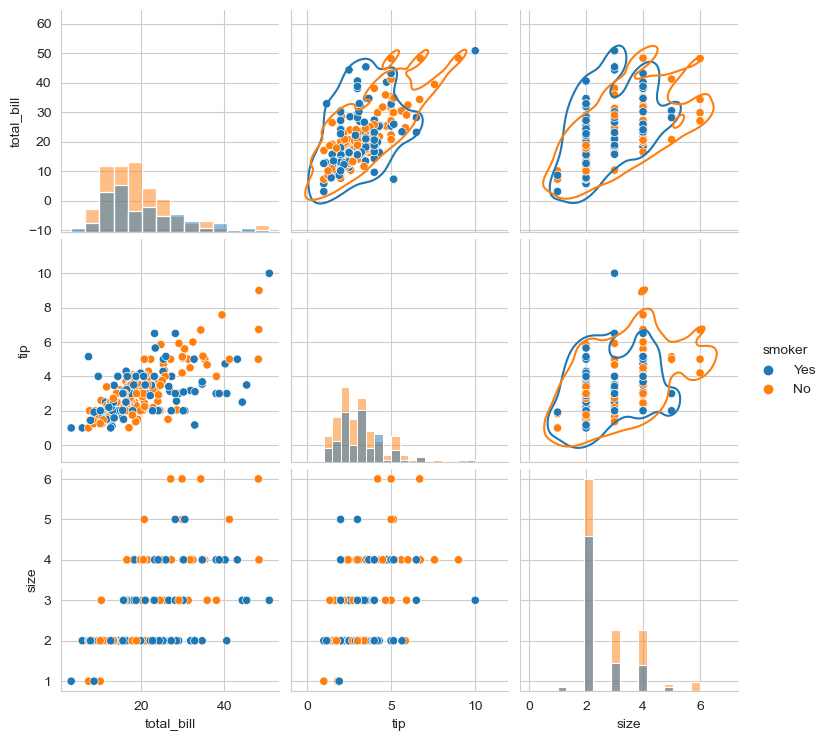

In [18]:
#Marker einsetzen
plot = sns.pairplot(df, hue="smoker", diag_kind="hist")
plot.map_upper(sns.kdeplot, levels=1)

## Pieplot


In [19]:
#Auf in den Planetendatensatz
planets = sns.load_dataset('planets')
planets

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


In [20]:
planets['method'].value_counts()

method
Radial Velocity                  553
Transit                          397
Imaging                           38
Microlensing                      23
Eclipse Timing Variations          9
Pulsar Timing                      5
Transit Timing Variations          4
Orbital Brightness Modulation      3
Astrometry                         2
Pulsation Timing Variations        1
Name: count, dtype: int64

In [21]:
#Daten zusammenfassen
method_count = planets['method'].value_counts()

method_better_counts = pd.Series()
method_better_counts["Radial Velocity"] = method_count["Radial Velocity"]
method_better_counts["Transit"] = method_count["Transit"]
method_better_counts["Other"] = method_count.sum()-(method_count["Radial Velocity"]+method_count["Transit"])
method_better_counts

Radial Velocity    553
Transit            397
Other               85
dtype: int64

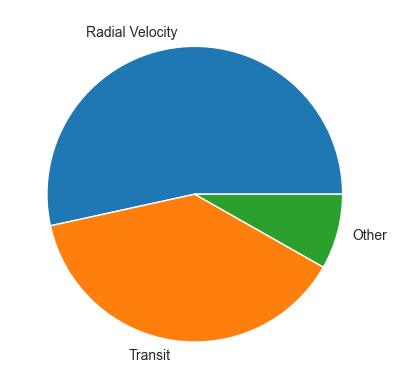

In [99]:
#Einfacher Pieplot
plt.pie(method_better_counts, labels=method_better_counts.index)
plt.show()

Sieht noch nicht so schick aus.
Wir brauchen folgendes:
- Wir wollen den Plot noch drehen können!
- Dateninformationen
- Lieber eine Legende?
- Titel und anderer Schnickschnack?


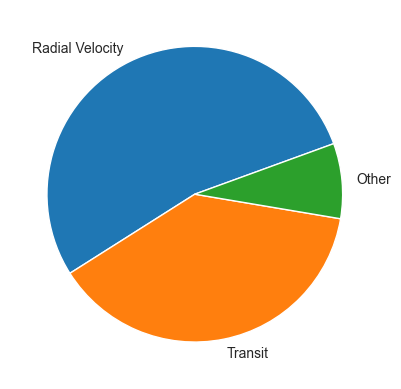

In [100]:
#Schritt 1: Wir drehen die Daten
plt.pie(method_better_counts, labels=method_better_counts.index, startangle=20)
plt.show()

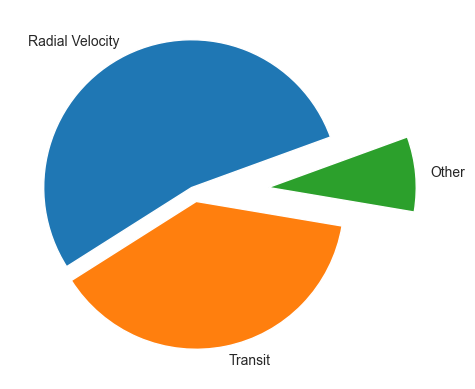

In [106]:
#Schritt 2: Wir ziehen den Plot etwas auseinander, damit alles etwas mehr Platz hat
pacman = [0.05,0.05,0.50]
plt.pie(method_better_counts, labels=method_better_counts.index, startangle=20, explode=pacman)
plt.show()

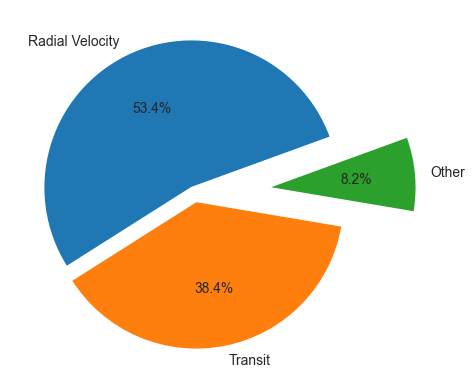

In [119]:
#Schritt 3: Wir fügen Datenbeschriftung hinzu
plt.pie(method_better_counts, labels=method_better_counts.index, startangle=20, explode=pacman, autopct="%.1f%%")
plt.show()

C:\Users\pasca\AppData\Local\Temp\ipykernel_20328\426982521.py:3: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(fig, labels=method_better_counts.index, title="Measuring Method", bbox_to_anchor=(1, 1))


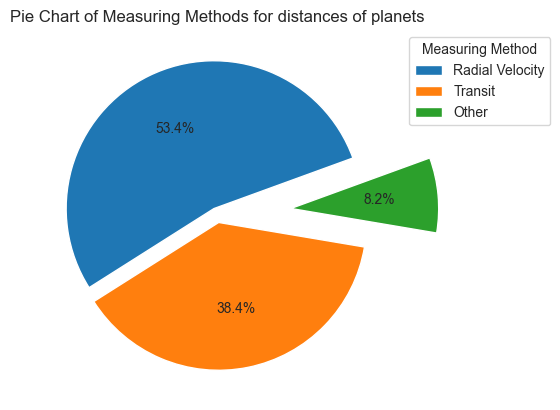

In [132]:
#Schritt 4: Legende und Titel?
fig = plt.pie(method_better_counts, startangle=20, explode=pacman, autopct="%.1f%%")
plt.legend(fig, labels=method_better_counts.index, title="Measuring Method", bbox_to_anchor=(1, 1))
plt.title("Pie Chart of Measuring Methods for distances of planets")
plt.show()

In [133]:
#Anzahl Geschlechter in den verschiedenen Klassen
titanic = sns.load_dataset("titanic")
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [143]:
#Daten vorbereiten
counter = titanic.groupby(['class', 'who'])
species_counter = counter.size().reset_index(name='counts')
species_counter

,class,who,counts
0,First,child,6
1,First,man,119
2,First,woman,91
3,Second,child,19
4,Second,man,99
5,Second,woman,66
6,Third,child,58
7,Third,man,319
8,Third,woman,114


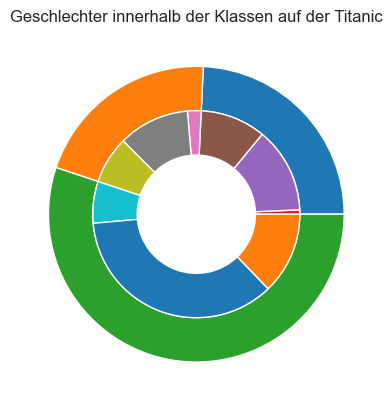

In [184]:
#Plot erstellen
fig, ax = plt.subplots()

size = 0.3

ax.pie(species_counter.groupby("class").sum()["counts"], radius=1,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(species_counter["counts"], radius=1-size,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='Geschlechter innerhalb der Klassen auf der Titanic')
plt.show()

## Übungsaufgabe Pieplot

### Erstelle die im Unterricht gezeigte Graphik